# Data Preparation & Exploration

2022-01-27 스터디

https://www.kaggle.com/bertcarremans/data-preparation-exploration/notebook

## Introduction

Porto Seguro는 브라질의 자동차 보험회사로, 이 notebook은 어떤 차주가 내년에 보험을 청구할지에 대한 예측을 한다.

9개의 main section으로 구성되어있다.

1. Visual inspection of your data
2. Defining the metadata
3. Descriptive statistics
4. Handling imbalanced classes
5. Data quality checks
6. Exploratory data visualization
7. Feature engineering
8. Feature selection
9. Feature scaling

## Loading packages

<span style="color:blue"> In [1]

사용할 라이브러리들 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

from skearn.preprocessing import Imputer

<span style="color:red"> => (변경) from sklearn.impute import SimpleImputer

## Loading data 

<span style="color:blue"> In [2]

다음은 대회에 대한 데이터 설명의 발췌문입니다.

- 유사한 그룹에 속하는 feature에는 feature name에 다음과 같은 태그가 부여된다.(예: ind, reg, car, calc)

- Feature 이름에는 이진 feature를 나타내는 접미사 bin, 범주형 feature를 나타내는 cat이 포함됩니다.

- 이러한 지정이 없는 feature는 연속 또는 순서형입니다.

- -1 값은 해당 피처가 관측치에서 누락되었음을 나타냅니다.

- target 열은 해당 보험 계약자에 대한 청구가 접수되었는지 여부를 나타냅니다.

이 모든 것을 확인하기 위해 첫 번째 행과 마지막 행을 간단히 살펴보겠습니다.

pandas의 read_csv 사용해서 csv파일들을 DF형식으로 load.

In [2]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

## Data at first sight

<span style="color:blue"> In [3]

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


<span style="color:blue"> In [4]

In [4]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


우리는 다음을 확인할 것입니다.

- 이항 변수

- 범주 값이 정수인 범주형 변수

- integer 또는 float 값을 갖는 기타 변수

- 결측값을 나타내는 -1이 있는 변수

- target 변수 및 ID 변수

<span style="color:blue"> In [5]

열차 데이터에 있는 행과 열의 수를 살펴봅시다.

In [5]:
train.shape

(595212, 59)

train data는 59개의 Column과 595,212개의 Row로 구성

<span style="color:blue"> In [6]

train data에 중복된 행이 있는지 확인

In [6]:
train.drop_duplicates()
train.shape

(595212, 59)

drop_duplicates() 메서드를 사용해서 중복 요소 삭제

<span style="color:blue"> In [7]

In [7]:
test.shape

(892816, 58)

test data는 58개의 Column과 892816개의 Row로 구성

train data와 비교했을때, test data에 column하나가 누락된 것을 확인할 수 있음.

그러나, 이는 target 변수이므로 상관없음.

<span style="color:blue"> In [8]

이제 각 유형별로 얼마나 많은 변수가 있는지 알아보겠습니다.

나중에 14개의 범주형(categorical, cat) 변수에 대한 더미 변수를 만들 수 있습니다. bin 변수는 이미 이항(binary, bin) 변수이므로 더미화가 필요하지 않습니다.

데이터는 float이거나 int64 데이터 타입입니다.

Null값은 없는것으로 나오는데, 누락값은 -1로 처리하였기 때문입니다.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

## Metadata

데이터 관리를 용이하게 하기 위해 DataFrame의 변수에 대한 메타 정보를 저장하겠습니다. 분석, 시각화, 모델링 등을 위해 특정 변수를 선택하고 싶을 때 유용합니다.

구체적으로 다음 사항을 저장할 것입니다.

- role: input, ID, target

- level: nominal(공칭), interval(구간), ordinal(서수), binary(이진)

- keep: True of False

- dtype: int, float, str

<span style="color:blue"> In [9]

data라는 빈 리스트 생성

**Defining the role**

train DF의 column을 하나씩 돌면서 feature 이름이 target인 경우, role에 target으로 저장.

id인 경우, role에 id로 저장.

target이나 id가 아닌 경우, input으로 저장

**Defining the level**

feature 이름에 bin이 있거나 target인 경우, level을 binary로 설정

(앞 조건에 해당하지 않으면서) feature 이름에 cat이 있거나 id인 경우, level을 nominal로 설정

(앞 조건에 해당하지 않으면서) data type이 float type인 경우, level을 interval로 설정

(앞 조건에 해당하지 않으면서) data type이 integer type인 경우, level을 ordinal로 설정

<span style="color:red"> level따지는 부분에서 train[f].dtype하는 경우, 반환값은 float64, int64 이런 문자열식으로 나옴. 즉 == float, == int가 아니라, == 'float64', == 'int64'를 해야 정상적으로 분류됨.
    
**Initialize keep to True for all variables except for id**

keep으로 True로 초기화해두고, 만약 id 피처인 경우, keep을 False로 설정

**Defining the data type**

dtype 변수를 사용해서 해당 피처의 data type을 구한 다음, dytpe에 저장

**Creating a Dict that contains all the metadata for the variable**

f_dict라는 딕셔너리 생성 후 한 columns씩 해당 정보를 저장. 

이는 모든 변수의 metadata 정보를 담고 있음.

varname은 피처이름, role은 저장된 role값, level은 저장된 level값, keep은 저장된 keep값, dtype은 저장된 dtype값으로 구성


varname, role, level, keep, dtype의 칼럼값을 갖는 DF meta 생성

meta DF의 인덱스 값은 set_index 사용하여 varname으로 설정

In [9]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == 'float64':
        level = 'interval'
    elif train[f].dtype == 'int64':
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train[f].dtype
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

<span style="color:blue"> In [10]

위에 분류한대로 잘 분류된 것을 확인

In [10]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


<span style="color:blue"> In [11]

dropped 되지 않으면서(keep이 True) nominal인 피처를 예시로 추출해 봄

In [11]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

<span style="color:blue"> In [12]

groupby를 사용하여 'role' 피처와 'level' 피처를 기준으로 'role' 피처의 크기를 size() 사용해서 집계하여 'count' 피처에 저장

reset_index() 해준 다음, 출력

In [12]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Descriptive statistics

우리는 데이터 프레임에 description 방법을 적용할 수도 있습니다. 

그러나 범주형 변수와 id 변수에 대해 평균이나 표준편차 등을 계산하는 것은 그다지 의미가 없습니다. 

범주형 변수는 나중에 시각적으로 살펴보겠습니다.

먼저 실수형 변수에 이런 description 방법을 활용

### Interval variables

<span style="color:blue"> In [13]

meta DF 중 level 피처의 값이 interval이면서 keep True인 인덱스 추출하여 v에 저장 (float type값들)

describe 함수 사용하여 평균이나 표준편차 등 계산

In [13]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


reg 변수

- ps_reg_03에만 결측값이 있습니다.

- 범위(최소값 ~ 최대값)는 변수마다 다릅니다. 스케일링(예: StandardScaler)을 적용할 수 있지만 사용하려는 분류기에 따라 다릅니다.


car 변수

- ps_car_12 및 ps_car_15에 결측값이 있습니다.

- 이번에도 범위가 달라서 스케일링을 적용할 수 있습니다.


calc 변수

- 결측값 없음

- 최대값이 0.9이기 때문에 이것은 일종의 비율인 것 같습니다.

- 세 _변수 모두 분포가 매우 유사합니다.


전체적으로 구간 변수의 범위가 다소 작다는 것을 알 수 있습니다. 데이터를 익명화하기 위해 변환(예: 로그)이 이미 적용되었을 수 있습니다.

### Ordinal variables

<span style="color:blue"> In [14]

meta DF 중 level 피처의 값이 ordinal이면서 keep True인 인덱스 추출하여 v에 저장 (integer type값들)

describe 함수 사용하여 평균이나 표준편차 등 계산

In [14]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


ps_car_11 피처만 결측값(-1)이 있습니다. 

모두 min, max range가 다르므로 scaling을 진행해야합니다.

### Binary variables

<span style="color:blue"> In [15]

meta DF 중 level 피처의 값이 binary이면서 keep True인 인덱스 추출하여 v에 저장 (target & bin 포함 피처)

describe 함수 사용하여 평균이나 표준편차 등 계산

In [15]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


train 데이터의 target은 3.645%로, 매우 불균형적입니다.

평균을 통해 대부분의 값들이 0이라는 결론을 내릴 수 있습니다.

## Handling imbalanced classes

위에서 언급했듯이 target=1인 레코드의 비율은 target=0보다 훨씬 작습니다. 

이는 정확도가 높지만 실제로는 부가가치가 있는 모델로 이어질 수 있습니다. (모두 다 target을 0으로 예측해도 얼마 안되는 1만 틀린 것으로 파악될 수 있음)

이 문제를 해결할 수 있는 두 가지 전략은 다음과 같습니다.

- target=1로 레코드를 오버샘플링
- target=0으로 레코드 언더샘플링

train 세트가 좀 커서 언더샘플링을 해도 될 것 같아요.

<span style="color:blue"> In [16]

desired_apriori=0.10은 언더샘플링 비율을 지정해주기 위함

**Get the indices per target value**

target 값이 0인 것은 idx_0으로, 1인 것은 idx_1로 인덱스값 저장

**Get original number of records per target value**

idx_0와 idx_1에 저장되어있는 인덱스에 해당하는 값의 len(길이)을 구해 각각 nb_0, nb_1에 저장

**Calculate the undersampling rate and resulting number of records with target=0**

언더샘플링을 수행하고, target=0에 대한 언더샘플링 비율과, 언더샘플링 후의 target=0 레코드 수를 출력하여 비교

**Randomly select records with target=0 to get at the desired a priori**

언더샘플링 비율이 적용된 개수만큼 랜덤하게 샘플을 뽑아서 그 인덱스를 undersampled_idx에 저장

**Construct list with remaining indices**

undersampled_idx(언더샘플링이 적용된 후 뽑은 샘플 리스트) + idx_1(클래스 1의 리스트) = idx_list

**Return undersample data frame**

저장한 idx_list에 해당하는 값들을 train set에서 뽑아내서 df_train에 저장

In [16]:
desired_apriori=0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


## Data Quality Checks 

### Checking missing values

<span style="color:blue"> In [17]

어느 피처에 어느정도의 결측치가 있는지를 확인

vars_with_missing이라는 리스트 생성

train의 column을 하나씩 돌면서, 값이 -1인 경우(결측치인 경우)를 count하여 missing에 저장

만약 missings값이 1 이상인 경우는 만들어둔 리스트에 그 피처를 저장
또 missings_perc에는 missings값에 전체 data 수의 값을 나눈 것을 저장

그리고 각 피처당 결측치의 수를 출력하고 마지막에 결측치가 있는 모든 피처의 개수를 출력

In [17]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


- ps_car_03_cat 및 ps_car_05_cat는 결측값이 있는 레코드의 비율이 높습니다. 이 변수를 제거합니다.

- 결측값이 있는 다른 범주형 변수의 경우 결측값 -1을 그대로 둘 수 있습니다.

- ps_reg_03 (continuous)에는 모든 레코드의 18%에 대한 결측값이 있습니다. 평균으로 대체합니다.

- ps_car_11 (연속)에는 결측값이 있는 레코드가 1개만 있습니다. 최빈값으로 대체합니다.(순서형 변수이므로)

- ps_car_12 (연속)에는 결측값이 있는 레코드가 1개만 있습니다. 평균으로 대체합니다. <span style="color:red">(ps_car_12가 없긴함)

- ps_car_14 (연속)에는 모든 레코드의 7%에 대한 결측값이 있습니다. 평균으로 대체합니다.
    
결론적으로 이 커널에서는 연속형 변수는 mean, 범주형 변수는 mode로 채워주었습니다.

출처: https://hong-yp-ml-records.tistory.com/92 [HONG YP's Data Science BLOG]

<span style="color:blue"> In [18]

**Dropping the variables with too many missing values**

결측치가 너무 많았던 ps_car_03_cat과 ps_car_05_cat은 vars_to_drop에 저장후, 해당 피처들은 제거

그리고, vars_to_drop에 해당하는 값들은 keep피처의 값을 False로 저장


**Imputing with the mean or mode**

SimpleImputer를 사용해서 그 외의 결측치는 평균과 최빈값으로 대체

In [18]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # Updating the meta

# Imputing with the mean or mode
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### Checking the cardinality of the categorical variables

cardinality는 변수의 서로 다른 값의 수를 나타냅니다. 

추후 범주형 변수에서 더미 변수를 만들 예정이기 때문에 고유한 값이 많은 변수가 있는지 확인이 필요합니다. 

이러한 변수들은 많은 더미 변수를 야기하기 때문에 그것들을 다르게 처리해야 합니다.

<span style="color:blue"> In [19]

nominal level의 인덱스값 v에 저장

하나씩 반복문돌면서, 각 피처마다 값의 종류가 몇가지인지 value_counts()하고 shape[0]해서 확인 후 출력

In [19]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


<span style="color:blue"> In [20]

series의 길이와 noise_level을 이용하여 noise를 추가해주는 add_noise 함수 정의

rn_series : 범주형 기능을 PD로 교육합니다.시리즈
tst_series : 범주형 피쳐를 PD로 테스트합니다.시리즈
target : PD로 대상 데이터를 지정합니다.시리즈
min_part_leaf(int): 범주 평균을 고려한 최소 표본
평활(int) : 범주형 평균 대 이전 값의 균형을 맞추기 위한 평활 효과

변수 초기화

trn_series와 target을 concat하여 temp에 저장

trn_series의 name 피처를 groupby한 것에서 target의 name피처의 평균과 count값 구함

smoothing 값 구함

prior값은 target의 평균

해당 target.name에 맞춰서 averages값 저장

averages에서 mean이랑 count는 drop

.to_frame은 시리즈를 데이터 프레임으로 변환

In [20]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

<span style="color:blue"> In [21]

ps_car_11_cat 을 encoded value로 대체한다.

train_encoded의 값을 ps_car_11_cat_te피처에 넣어주고, train에서 ps_car_11_cat은 제거

metadataset에서 ps_car_11_cat의 정보를 keep = False로 바꿔주고

test_encoded의 값도 ps_car_11_cat_te에 넣어줌

test에서도 ps_car_11_cat은 제거

In [21]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

## Exploratory Data Visulaization

### Categorical variables

범주형 변수 및 목표값 = 1인 고객 비율에 대해 알아보겠습니다.

<span style="color:blue"> In [22]

nominal level의 인덱스 v에 저장

20x10 크기의 barplot 그릴 것

v에 저장된 피처 하나씩 반복문 돌면서,

해당 피처와 target을 기준으로 같이 groupby하고 해당 피처의 평균값 구해서 cat_perc에 저장

그리고 cat_perc를 sort_values 사용하여 target을 기준으로 내림차순 정렬

x는 해당 피처, y는 target 피처로 지정 data와 order 파라미터 설정, label명은 y축은 %target x축은 해당 피처 이름

tick_params 사용해서 그래프의 틱과 관련된 설정

axis='both' : x,y축의 틱이 모두 적용

labelsize는 18

<Figure size 432x288 with 0 Axes>

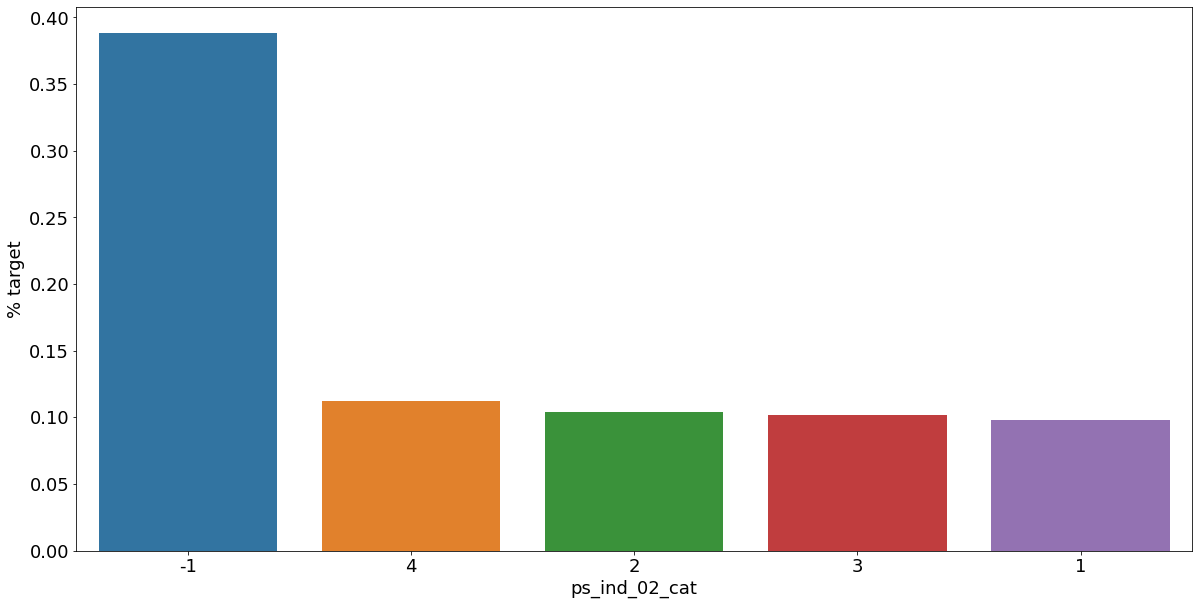

<Figure size 432x288 with 0 Axes>

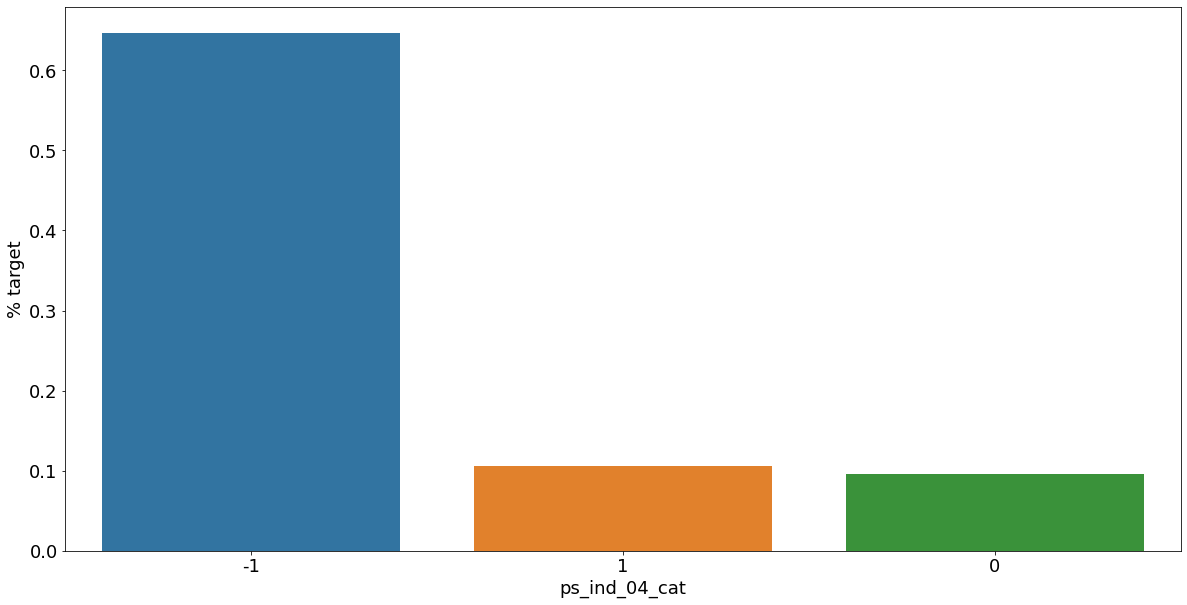

<Figure size 432x288 with 0 Axes>

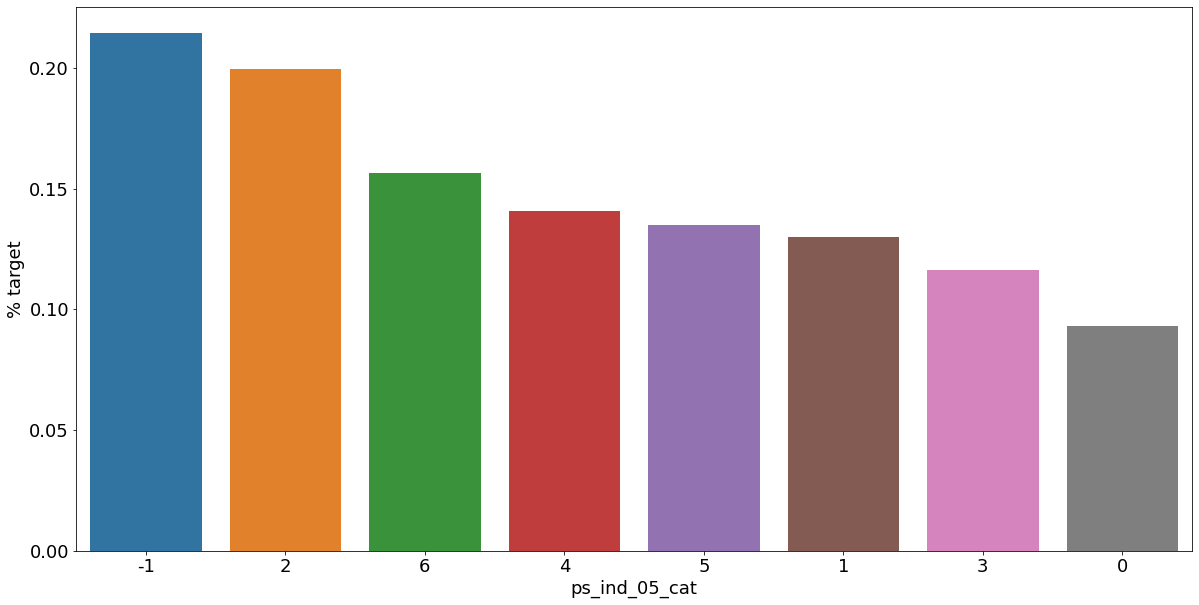

<Figure size 432x288 with 0 Axes>

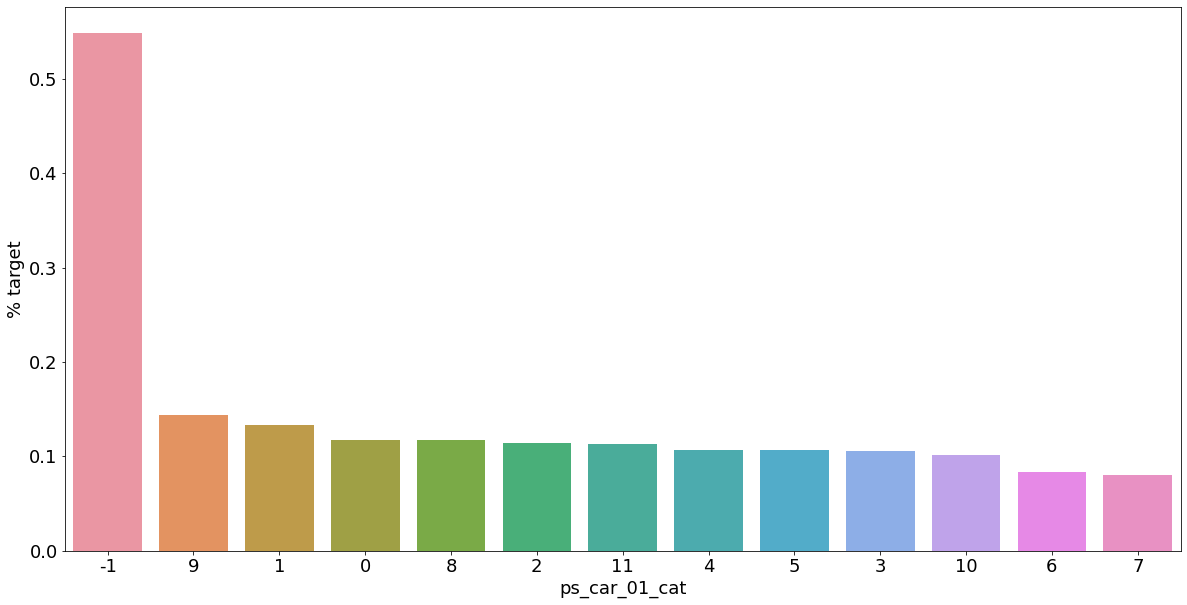

<Figure size 432x288 with 0 Axes>

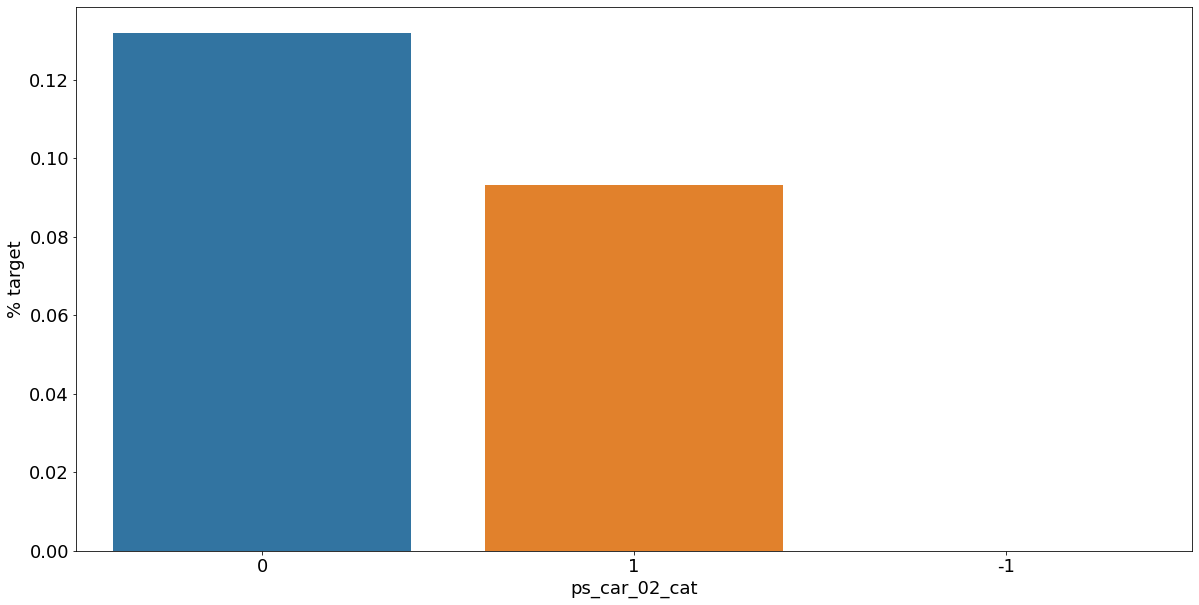

<Figure size 432x288 with 0 Axes>

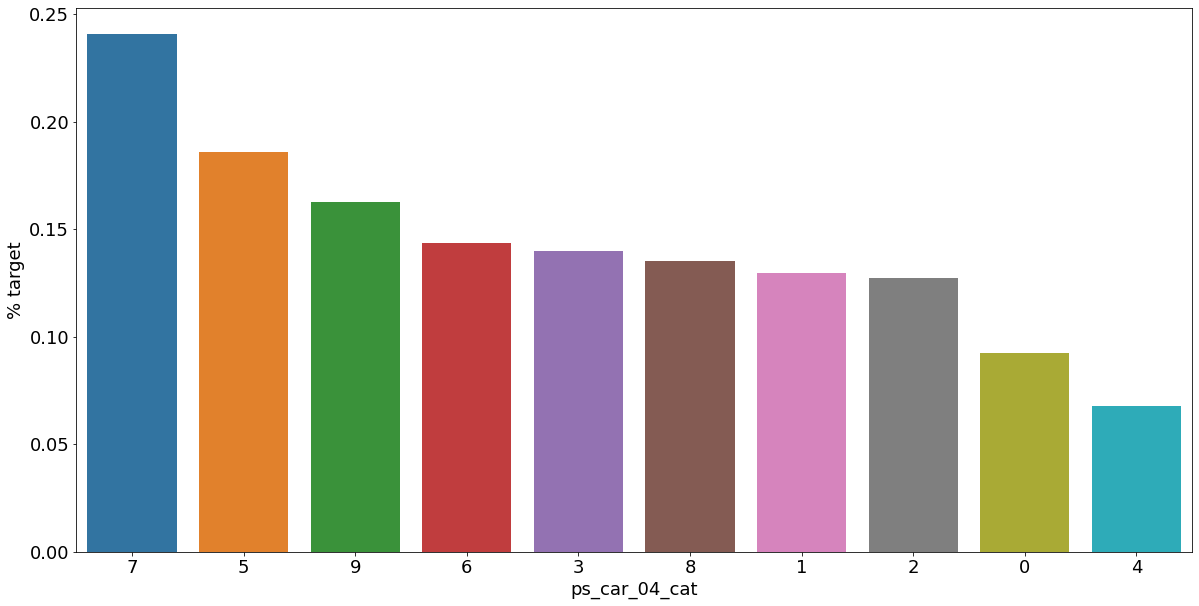

<Figure size 432x288 with 0 Axes>

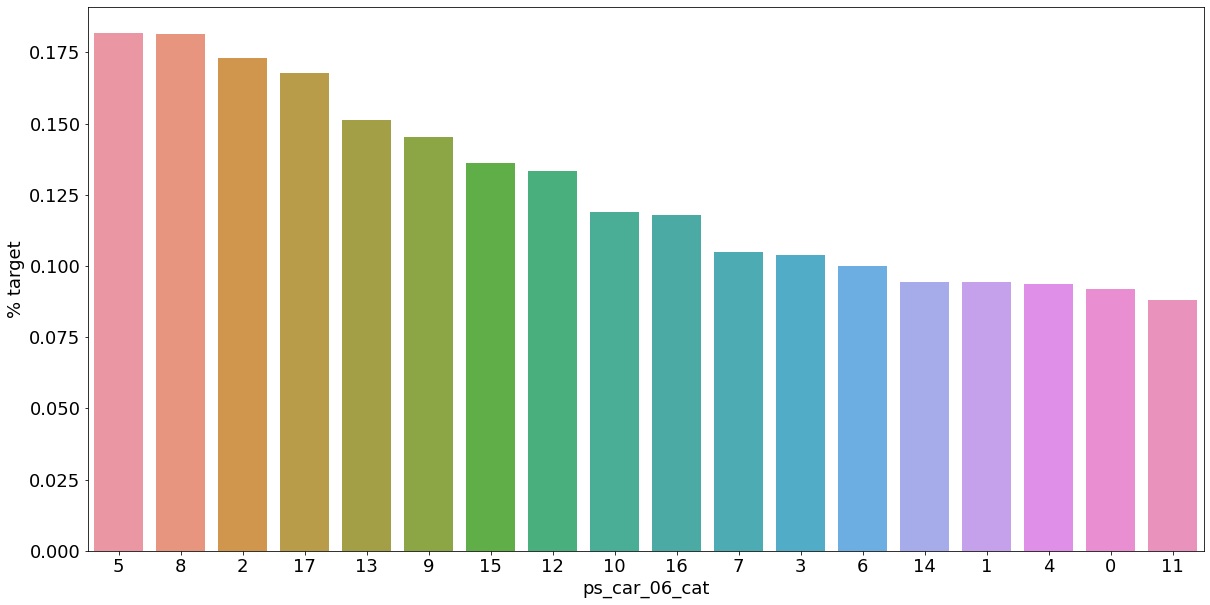

<Figure size 432x288 with 0 Axes>

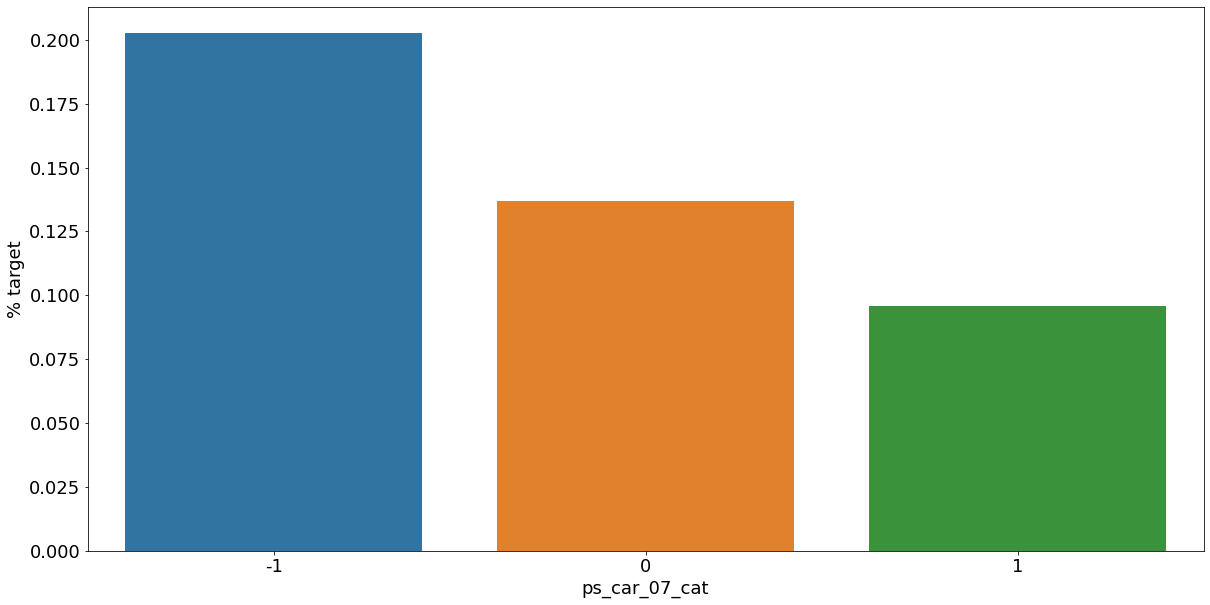

<Figure size 432x288 with 0 Axes>

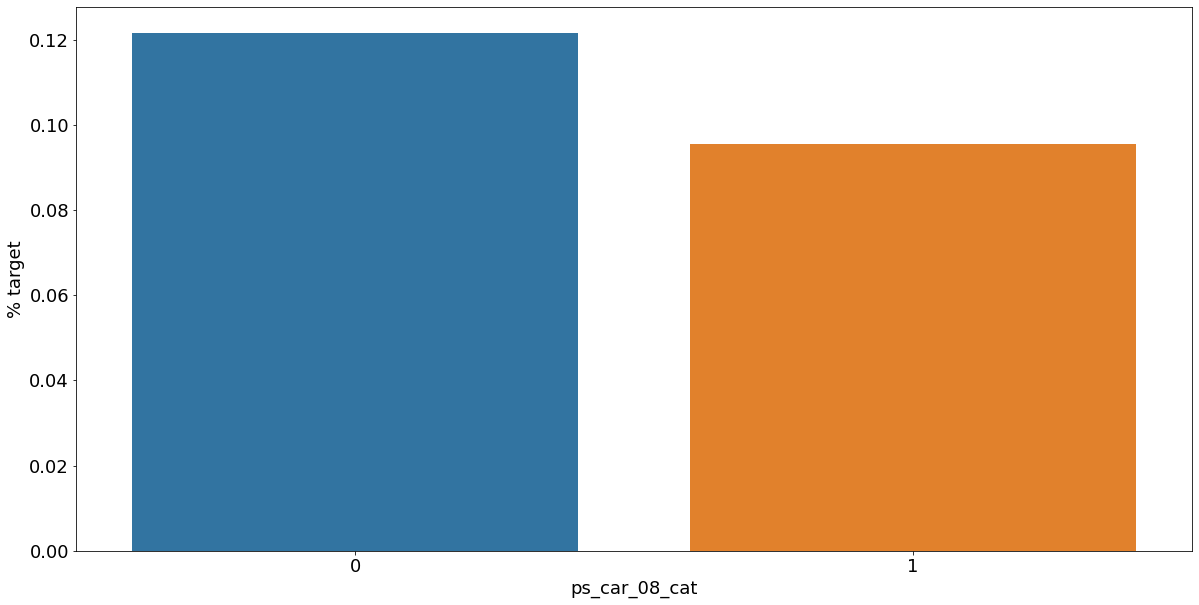

<Figure size 432x288 with 0 Axes>

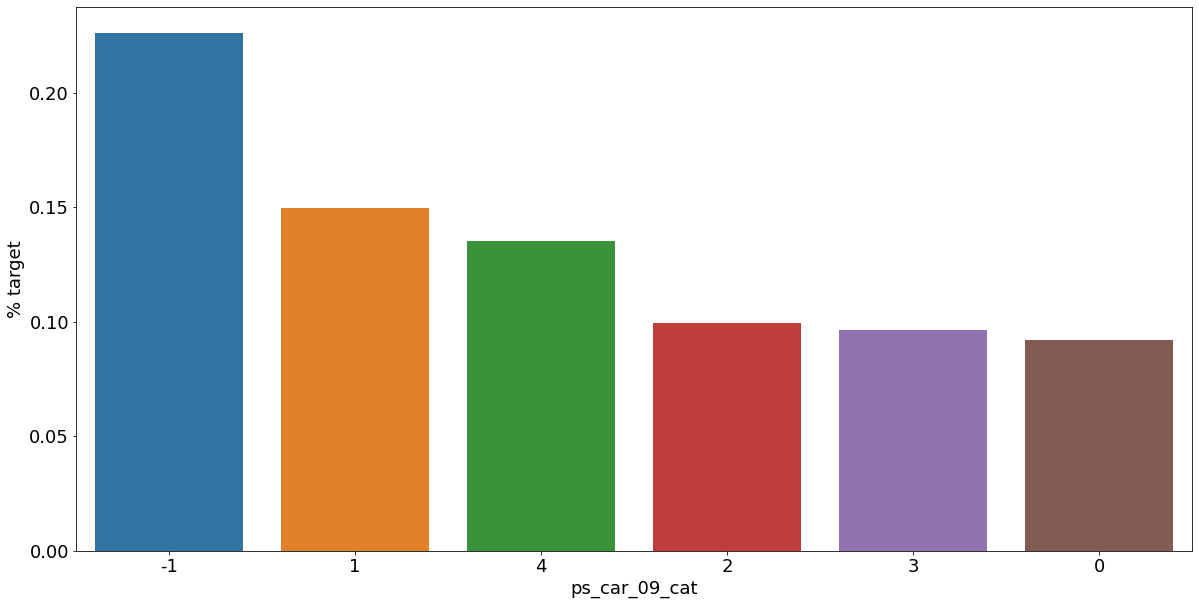

<Figure size 432x288 with 0 Axes>

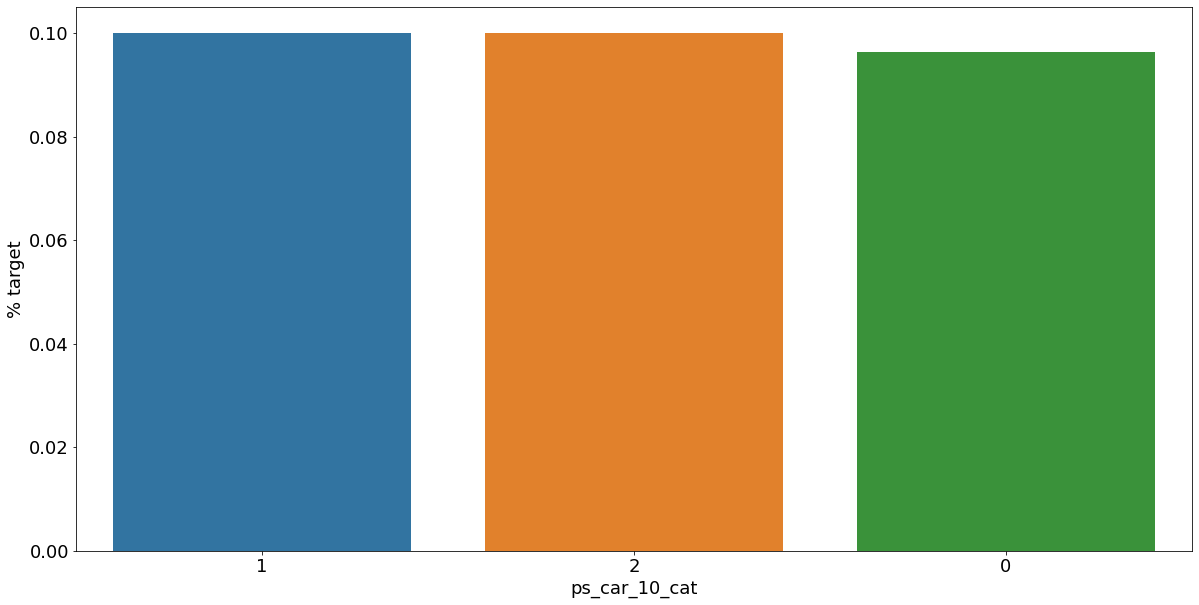

In [22]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

결측값이 있는 고객은 보험 청구를 요청할 확률이 훨씬 높은 것으로 보인다.(낮은 경우도 있음) 이를 최빈값으로 교체하는 등 방법이 다양하게 있을 것이다.

### Interval variables

<span style="color:blue"> In [23]

히트맵으로 각 피처당 상관관계를 볼 수 있음

correlations에 train에 있는 피처들의 상관계수 저장

색은 diverging_palette라는 것을 사용해줌

10x10 크기로 히트맵 생성

[heatmap parameter]

- cmap : 색 팔레트 옵션 설정

- vmax : 색으로 표현하는 값의 최대값 (상관계수는 최대 1)

- center : 셀안에 들어갈 값

- fmt : 소수점 아래 두자리수까지 표현

- square : 셀을 정사각형으로 출력

- linewidths : 각 셀마다의 선의 굵기

- annot : 셀의 값 표기 (True = O)

- cbar_kws : 컬러바 크기 설정

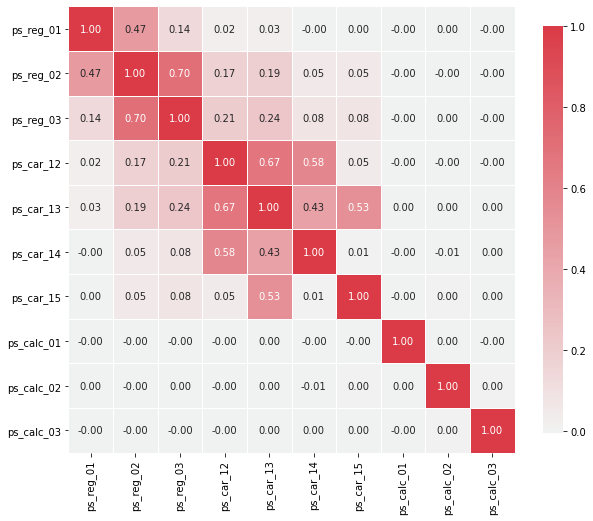

In [23]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

아래의 변수들은 강한 상관 관계를 가집니다.

ps_reg_02 and ps_reg_03 (0.7)

ps_car_12 and ps_car13 (0.67)

ps_car_12 and ps_car14 (0.58)

ps_car_13 and ps_car15 (0.67)

Seaborn은 변수들 사이의 (선형) 관계를 시각화할 수 있는 몇 가지 유용한 플롯을 가지고 있다. 

우리는 변수들 사이의 관계를 시각화하기 위해 Pairplot 사용할 수 있습니다.

하지만 Heatmap에서 이미 제한된 수의 상관 변수를 보여 주었기 때문에, 우리는 각각의 높은 상관 관계를 가진 변수들을 개별적으로 살펴보도록 하겠습니다.

<span style="color:blue"> In [24]

추출할 표본 비율을 0.1로 두고 sample 추출해서 s에 저장 (속도를 높이기 위함)

In [24]:
s = train.sample(frac=0.1)

### ps_reg_02 and ps_reg_03

<span style="color:blue"> In [25]

Implot 사용하여 회귀 판단.

x축은 ps_reg_02 피처, y축은 ps_reg_03 피처, data는 뽑아두었던 sample인 s로 설정, hue값은 target값으로, scatter_kws 사용하여 기호 크기도 조절

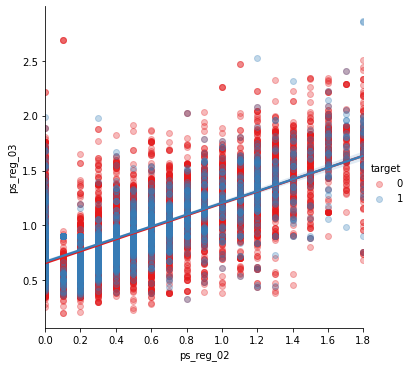

In [25]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

ps_reg_02 및 ps_reg_03 회귀선에서 알 수 있듯이 이러한 변수 사이에는 선형 관계가 있습니다.

hue 매개 변수는 target = 0과 target = 1에 대한 회귀선이 동일 함을 알 수 있습니다.

### ps_car_12 and ps_car_13

<span style="color:blue"> In [26]

Implot 사용하여 회귀 판단.

x축은 ps_reg_12 피처, y축은 ps_reg_13 피처, data는 뽑아두었던 sample인 s로 설정, hue값은 target값으로, scatter_kws 사용하여 기호 크기도 조절

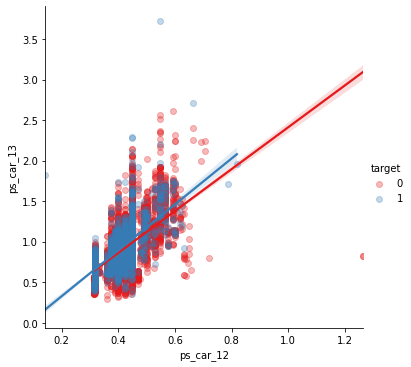

In [26]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

ps_car_12, ps_car_13의 선형관계

### ps_car_12 and ps_car_14

<span style="color:blue"> In [27]

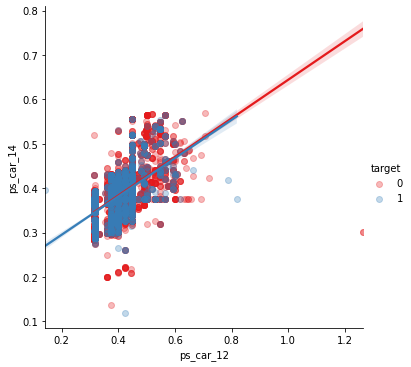

In [27]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

ps_car_12, ps_car_14의 선형관계

### ps_car_13 and ps_car_15

<span style="color:blue"> In [28]

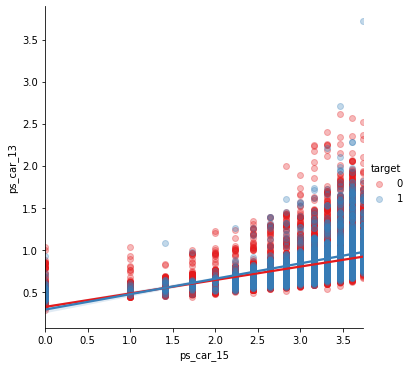

In [28]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

ps_car_15와 ps_car_13

변수에 대해 PCA (주성분 분석)를 수행하여 차원을 줄일 수 있습니다.

하지만 상관 변수의 수가 적기 때문에 모델이 무거운 작업을 수행하도록 할 것입니다.

### Checking the correlations between ordinal variables

<span style="color:blue"> In [29]

interval level과 마찬가지로 ordinal level도 heatmap그려서 상관관계 확인

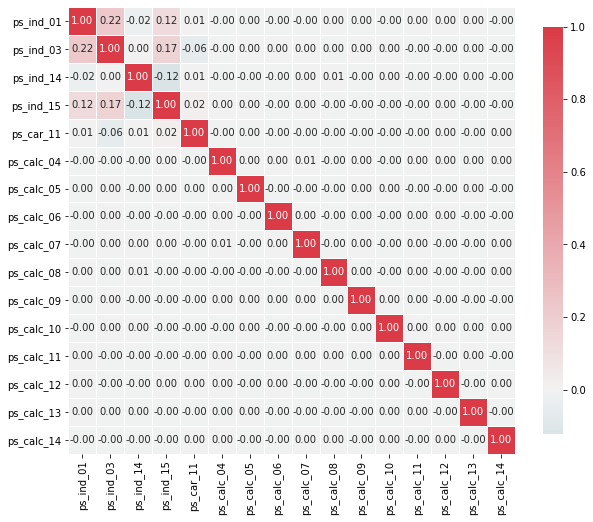

In [29]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

Ordinal variables의 경우 많은 상관 관계를 볼 수 없다.

하지만 Tatget Value으로 그룹화할 때 분포가 어떻게 되는지 살펴볼 수 있다.

## Feature engineering 

### Creating dummy variables

<span style="color:blue"> In [30]

nominal level만 추출하여 저장하고, 행 개수 출력

get_dummies 하여서 원핫인코딩 해준 후 피처 개수와 비교

In [30]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


Categorical variables의 값은 순서나 크기를 나타내지 않는다. 예를 들어 범주 2는 범주 1의 두 배가 아니다.

그러므로 우리는 그것을 다룰 더미 변수를 만들 수 있다.

이 정보는 원래 변수의 범주에 대해 생성된 다른 더미 변수에서 파생될 수 있으므로 첫 번째 더미 변수를 삭제한다.

총 52개의 dummy 변수를 생성하였습니다.

### Creating interaction variables

<span style="color:blue"> In [31]

interval level을 v에 저장

비선형 회귀분석(다항회귀)을 하는 PolynominalFeatures객체 생성

새롭게 정의한 것을 interactions에 넣어주고, 기존 것은 drop

회귀분석 전과 후의 피처수 비교

In [31]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


get_feature_names 메서드를 사용해서 편하게 interactions variables을 추가하였습니다.

## Feature selection

### Removing features with low or zero variance

<span style="color:blue"> In [32]

변동이 없거나 매우 낮은 특성을 제거하는 것입니다. (분산이 0인것)

Sklearn에는 VarianceThreshold라는 편리한 방법이 있습니다. 

기본적으로 분산이 0 인 기능을 제거합니다.

이전 단계에서 0 분산 변수가 없음을 확인 했으므로 이 대회에는 적용되지 않습니다.

그러나 분산이 1 % 미만인 특성을 제거하면 31 개의 변수가 제거됩니다.

Vectorize는 매트릭스 구조의 데이터의 연산을 일괄적으로 처리할 수 있도록 Series, DataFrame, array 등과 같이 시퀀스형 자료를 함수의 매개변수로 포함시킬 수 있게 하는 것을 말한다.

분산이 기준치보다 낮은 특징 데이터는 사용하지 않는 방법이 분산에 의한 선택 방법이다

VarianceThreshold 객체 생성. train에서 id랑 target은 drop 한 다음 학습시킴

vectorize lambda함수 사용해서 f에 저장

id랑 target을 drop한 것 중 

get_support 메서드는 선택된 특성을 불리언 값으로 표시해주어 어떤 특성이 선택되었는지 확인 할 수 있다.

In [32]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


분산을 기반으로 선택하면 다소 많은 변수(31개)를 잃게됩니다. 

그러나 변수가 너무 많지 않기 때문에 classifier가 선택하도록 할 것입니다.

더 많은 변수가있는 데이터 세트의 경우 처리 시간을 줄일 수 있습니다.

Sklearn은 또한 다른 기능 선택 방법과 함께 제공됩니다.

이러한 메서드 중 하나는 another classifier가 최상의 기능을 선택하고 계속 진행하도록하는 SelectFromModel입니다.

아래에서는 Random Forest로 수행하겠습니다.

### Selecting features with a Random Forest and SelectFromModel

<span style="color:blue"> In [33]

여기서는 랜덤 포레스트의 feature importances를 기준으로 기능 선택을 할 것입니다.

Sklearn의 SelectFromModel을 사용하면 유지할 변수 수를 지정할 수 있습니다.

feature importances 수준에 대한 threshold를 수동으로 설정할 수 있습니다.

그러나 우리는 단순히 상위 50 % 최고의 변수를 선택합니다.

x축은 id와 target을 drop한 값 y_train은 target값

랜덤포레스트 모델 객체 생성. 학습. 피처중요도 추출해서 importances에 저장

피처 중요도를 내림차순으로 정렬해서 indices에 저장한다음, 출력

In [33]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021133
 2) ps_car_13                      0.017378
 3) ps_car_13^2                    0.017304
 4) ps_car_12 ps_car_13            0.017264
 5) ps_car_13 ps_car_14            0.017155
 6) ps_reg_03 ps_car_13            0.017065
 7) ps_car_13 ps_car_15            0.016811
 8) ps_reg_01 ps_car_13            0.016783
 9) ps_reg_03 ps_car_14            0.016237
10) ps_reg_03 ps_car_12            0.015594
11) ps_reg_03 ps_car_15            0.015104
12) ps_car_14 ps_car_15            0.015001
13) ps_car_13 ps_calc_01           0.014740
14) ps_car_13 ps_calc_03           0.014721
15) ps_reg_01 ps_reg_03            0.014694
16) ps_car_13 ps_calc_02           0.014656
17) ps_reg_02 ps_car_13            0.014648
18) ps_reg_01 ps_car_14            0.014416
19) ps_reg_03                      0.014189
20) ps_reg_03^2                    0.014179
21) ps_reg_03 ps_calc_03           0.013776
22) ps_reg_03 ps_calc_02           0.013766
23) ps_reg_03 ps_calc_01        

<span style="color:blue"> In [34]

In [34]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of features after selection: 81


SelectFromModel을 사용하여 사용할 prefit classifier와 feature importances에 대한 threshold을 지정할 수 있습니다.

get_support 메소드를 사용하면 train 데이터의 변수 수를 제한 할 수 있습니다.

<span style="color:blue"> In [35]

train 데이터에 target까지 더함

In [35]:
train = train[selected_vars + ['target']]

## Feature scaling 

<span style="color:blue"> In [36]

train 데이터에 standardscaler를 적용 할 수 있습니다.

이 작업이 완료되면 일부 classifier가 더 잘 작동됩니다.

In [36]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])

## Conclusion